<a href="https://colab.research.google.com/github/Nattakonjpg/BasicProg_DataViz65/blob/main/Project2_Aj_pitchaya.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 2 : Analyzing data from MovieLens

** Due Date: Due Date: Sunday, October 16 **

**NOTE: There are always last minute issues submitting the case studies. DO NOT WAIT UNTIL THE LAST MINUTE!**


**TEAM Members:** Please EDIT this cell and add the names of all the team members in your team

1. 
2. 
3. 
4. 
5. 
6. 

**Objectives** (เป้าหมาย)
* In this case study we will look at the MovieLens 1M Data Set.
    * It contains data about users and how the rate movies.
    * http://grouplens.org/datasets/movielens/
* The idea is to *analyze* the data set, make *conjectures*, support or refute those conjectures with *data*, and *tell a story* about the data!
    
**Useful Readings:** (อ่านแล้วมีประโยชน์)
* Chapter 14.2 (only the section on the MovieLens 1M Data Set), Chapter 5, 6.2, 7.2, 8, and 9 of the book [Python for Data Analysis](http://shop.oreilly.com/product/0636920023784.do)  (View pivately on Google Classroom).
* If you want your code to be really compact then you might want to also look into the pivot_table method of Panda's DataFrame, though there are many other ways to complete the case study!

**Required Python libraries:**
* Pandas (pandas.pydata.org)
* Matplotlib (matplotlib.org)

**NOTE** (ห้ามลืมเซฟบ่อยๆ)
- Please don't forget to save the notebook frequently when working in IPython Notebook, otherwise the changes you made can be lost.

# Problem 1: 

## Importing the MovieLens data set and merging it into a single Pandas DataFrame
## = การนำเข้าชุดข้อมูล MovieLens และรวมเป็น Pandas DataFrame เดียว

* Download the 1 million ratings data set from https://grouplens.org/datasets/movielens/1m/ (though if you are feeling adventerous you can download the 10 million ratings file instead)
- โหลดข้อมูล
* Merge all of the data into a single Pandas DataFrame. See 
    * https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html
* Store the data into an HDF5 file. See 
    * https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_hdf.html
    * https://pandas.pydata.org/docs/reference/api/pandas.read_hdf.html

#Load Data to Colab

In [74]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [75]:
import pandas as pd

In [76]:
pd.options.display.max_rows = 10

In [77]:
unames = ['user_id', 'gender', 'age', 'occupation', 'zip'] # File 1
users = pd.read_table('/content/drive/My Drive/warehouse/users.csv', sep='::',header=None, names=unames)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


In [78]:
users

,user_id,gender,age,occupation,zip
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455
...,...,...,...,...,...
6035,6036,F,25,15,32603
6036,6037,F,45,1,76006
6037,6038,F,56,1,14706
6038,6039,F,45,0,01060


In [79]:
rnames = ['user_id', 'movie_id', 'rating', 'timestamp'] # File 2
ratings = pd.read_table('/content/drive/My Drive/warehouse/ratings.csv', sep='::',header=None, names=rnames)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


In [80]:
ratings.head(50)

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
...,...,...,...,...
45,1,1028,5,978301777
46,1,1029,5,978302205
47,1,1207,4,978300719
48,1,2028,5,978301619


In [81]:
mnames = ['movie_id', 'title', 'genres'] # File 3
movies = pd.read_table('/content/drive/My Drive/warehouse/movies.csv', sep='::',header=None, names=mnames, encoding='latin-1')

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


In [82]:
movies.head(50)

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
45,46,How to Make an American Quilt (1995),Drama|Romance
46,47,Seven (Se7en) (1995),Crime|Thriller
47,48,Pocahontas (1995),Animation|Children's|Musical|Romance
48,49,When Night Is Falling (1995),Drama|Romance


In [83]:
data = pd.merge(pd.merge(ratings, users), movies) # Dataframe
data.head(20) 

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama
...,...,...,...,...,...,...,...,...,...,...
15,49,1193,4,978813972,M,18,12,77084,One Flew Over the Cuckoo's Nest (1975),Drama
16,53,1193,5,977946400,M,25,0,96931,One Flew Over the Cuckoo's Nest (1975),Drama
17,54,1193,5,977944039,M,50,1,56723,One Flew Over the Cuckoo's Nest (1975),Drama
18,58,1193,5,977933866,M,25,2,30303,One Flew Over the Cuckoo's Nest (1975),Drama


In [84]:
data.to_hdf('data.h5', key='data', mode='w') #(ชื่อใช้เรียกหลังแปลง, key=ไฟล์ที่ะจแปลง)

In [85]:
pd.read_hdf('data.h5', 'data')   ### แปลงเป็น hdf5

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama
...,...,...,...,...,...,...,...,...,...,...
1000204,5949,2198,5,958846401,M,18,17,47901,Modulations (1998),Documentary
1000205,5675,2703,3,976029116,M,35,14,30030,Broken Vessels (1998),Drama
1000206,5780,2845,1,958153068,M,18,17,92886,White Boys (1999),Drama
1000207,5851,3607,5,957756608,F,18,20,55410,One Little Indian (1973),Comedy|Drama|Western


In [ ]:
df = pd.read_hdf('data.h5', 'data')   

#Probelm 1
Report some basic details of the data you collected.  For example:

*  How many movies have an average rating over 4.5 overall?
*  How many movies have an average rating over 4.5 among men?  How about women?
*  How many movies have an *median* rating over 4.5 among men over age 30?  How about women over age 30?
*  What are the ten most popular movies?
    * Choose what you consider to be a reasonable defintion of "popular".
    * Be perpared to defend this choice.
*  Make some conjectures about how easy various groups are to please? Support your answers with data!  
    *  For example, one might conjecture that people between the ages of 1 and 10 are the easiest to please since they are all young children.  This conjecture may or may not be true, but how would you support or disprove either conclusion with with data?
    *  Be sure to come up with your own conjectures and support them with data!

### 1.1How many movies have an average(mean) rating over 4.5 overall?
* มีภาพยนตร์กี่เรื่อง ? ที่มีคะแนนเฉลี่ยมากกว่า 4.5 โดยรวม

In [ ]:
data

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama
...,...,...,...,...,...,...,...,...,...,...
1000204,5949,2198,5,958846401,M,18,17,47901,Modulations (1998),Documentary
1000205,5675,2703,3,976029116,M,35,14,30030,Broken Vessels (1998),Drama
1000206,5780,2845,1,958153068,M,18,17,92886,White Boys (1999),Drama
1000207,5851,3607,5,957756608,F,18,20,55410,One Little Indian (1973),Comedy|Drama|Western


In [ ]:
data.isnull().any() #ไม่มี

user_id       False
movie_id      False
rating        False
timestamp     False
gender        False
age           False
occupation    False
zip           False
title         False
genres        False
dtype: bool

In [ ]:
rat45 = data[(data['rating']>4.5)][['rating','title']]
rat45

,rating,title
0,5,One Flew Over the Cuckoo's Nest (1975)
1,5,One Flew Over the Cuckoo's Nest (1975)
4,5,One Flew Over the Cuckoo's Nest (1975)
6,5,One Flew Over the Cuckoo's Nest (1975)
7,5,One Flew Over the Cuckoo's Nest (1975)
...,...,...
1000189,5,Brother Minister: The Assassination of Malcolm...
1000195,5,Lured (1947)
1000199,5,Song of Freedom (1936)
1000204,5,Modulations (1998)


In [ ]:
rat455 = rat45.drop_duplicates('title', keep='last')
rat455

,rating,title
1722,5,One Flew Over the Cuckoo's Nest (1975)
2247,5,James and the Giant Peach (1996)
2882,5,My Fair Lady (1964)
4198,5,Erin Brockovich (2000)
5902,5,"Bug's Life, A (1998)"
...,...,...
1000189,5,Brother Minister: The Assassination of Malcolm...
1000195,5,Lured (1947)
1000199,5,Song of Freedom (1936)
1000204,5,Modulations (1998)


In [ ]:
rat455.duplicated() #ข้อมูล Clean แล้ว

1722       False
2247       False
2882       False
4198       False
5902       False
           ...  
1000189    False
1000195    False
1000199    False
1000204    False
1000207    False
Length: 3232, dtype: bool

* How many movies have an average(mean) rating over 4.5 overall = 3232 เรื่อง

###1.2 How many movies have an average rating over 4.5 among men?  How about women?

In [ ]:
data12 = data[(data['rating']>4.5)][['rating','title','gender']]
data12

,rating,title,gender
0,5,One Flew Over the Cuckoo's Nest (1975),F
1,5,One Flew Over the Cuckoo's Nest (1975),M
4,5,One Flew Over the Cuckoo's Nest (1975),M
6,5,One Flew Over the Cuckoo's Nest (1975),M
7,5,One Flew Over the Cuckoo's Nest (1975),F
...,...,...,...
1000189,5,Brother Minister: The Assassination of Malcolm...,M
1000195,5,Lured (1947),M
1000199,5,Song of Freedom (1936),F
1000204,5,Modulations (1998),M


In [ ]:
data122 = data12.drop_duplicates('title', keep='last')
data122

,rating,title,gender
1722,5,One Flew Over the Cuckoo's Nest (1975),F
2247,5,James and the Giant Peach (1996),F
2882,5,My Fair Lady (1964),M
4198,5,Erin Brockovich (2000),M
5902,5,"Bug's Life, A (1998)",F
...,...,...,...
1000189,5,Brother Minister: The Assassination of Malcolm...,M
1000195,5,Lured (1947),M
1000199,5,Song of Freedom (1936),F
1000204,5,Modulations (1998),M


In [ ]:
data122[(data12['gender']=='F')].count() #เพศหยิงใช้คะแนนเฉลี่ยหนังมากกว่า 4.5 ทั้งหมด 1208 คน

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


rating    1208
title     1208
gender    1208
dtype: int64

* เพศหญิงให้คะแนนเฉลี่ยหนังมากกว่า 4.5 ทั้งหมด 1208 คน

In [ ]:
data122[(data12['gender']=='M')].count() ##เพศชายใช้คะแนนเฉลี่ยหนังมากกว่า4.5 ทั้งหมด 2024 คน

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


rating    2024
title     2024
gender    2024
dtype: int64

* เพศชายให้คะแนนเฉลี่ยหนังมากกว่า 4.5 ทั้งหมด 2024 คน

###1.3 How many movies have an *median* rating over 4.5 among men over age 30?  How about women over age 30?
* มีภาพยนตร์กี่เรื่องที่มีคะแนน *ค่าmean* มากกว่า 4.5 ในหมู่ผู้ชายอายุเกิน 30 ปี แล้วผู้หญิงอายุ 30 ขึ้นไปล่ะ?

In [ ]:
data133 =data[['title','rating','gender','age']]
data133

,title,rating,gender,age
0,One Flew Over the Cuckoo's Nest (1975),5,F,1
1,One Flew Over the Cuckoo's Nest (1975),5,M,56
2,One Flew Over the Cuckoo's Nest (1975),4,M,25
3,One Flew Over the Cuckoo's Nest (1975),4,M,25
4,One Flew Over the Cuckoo's Nest (1975),5,M,50
...,...,...,...,...
1000204,Modulations (1998),5,M,18
1000205,Broken Vessels (1998),3,M,35
1000206,White Boys (1999),1,M,18
1000207,One Little Indian (1973),5,F,18


In [ ]:
data133.sort_values('title',ascending=0)

,title,rating,gender,age
379537,eXistenZ (1999),4,F,25
379512,eXistenZ (1999),3,M,35
379536,eXistenZ (1999),3,M,25
379535,eXistenZ (1999),4,M,35
379534,eXistenZ (1999),4,F,35
...,...,...,...,...
985702,"$1,000,000 Duck (1971)",2,M,18
985701,"$1,000,000 Duck (1971)",4,M,35
985700,"$1,000,000 Duck (1971)",2,F,50
985699,"$1,000,000 Duck (1971)",3,F,35


In [ ]:
data133c = data133.drop_duplicates('title', keep='last')
data133c

,title,rating,gender,age
1724,One Flew Over the Cuckoo's Nest (1975),4,M,25
2249,James and the Giant Peach (1996),3,F,45
2885,My Fair Lady (1964),4,F,45
4200,Erin Brockovich (2000),4,F,25
5903,"Bug's Life, A (1998)",4,F,25
...,...,...,...,...
1000204,Modulations (1998),5,M,18
1000205,Broken Vessels (1998),3,M,35
1000206,White Boys (1999),1,M,18
1000207,One Little Indian (1973),5,F,18


In [ ]:
data133ca = data133c[(data133c['age']>=35)][['rating','title','gender','age']]
data133ca # ได้ตารางที่มีชื่อหนัง เพศ อายุที่ตั้งแต่ 35 ขึ้นไป เพราะอายุ 35= 35-44

,rating,title,gender,age
2249,3,James and the Giant Peach (1996),F,45
2885,4,My Fair Lady (1964),F,45
8221,4,"Princess Bride, The (1987)",F,45
10277,4,"Christmas Story, A (1983)",F,45
13818,3,Beauty and the Beast (1991),M,45
...,...,...,...,...
1000198,1,"Silence of the Palace, The (Saimt el Qusur) (1...",F,56
1000199,5,Song of Freedom (1936),F,56
1000201,3,Nemesis 2: Nebula (1995),F,35
1000202,4,Smoking/No Smoking (1993),F,35


In [ ]:
data13 = data[(data['rating']>4.5)][['rating','title','gender','age']]
data13

,rating,title,gender,age
0,5,One Flew Over the Cuckoo's Nest (1975),F,1
1,5,One Flew Over the Cuckoo's Nest (1975),M,56
4,5,One Flew Over the Cuckoo's Nest (1975),M,50
6,5,One Flew Over the Cuckoo's Nest (1975),M,1
7,5,One Flew Over the Cuckoo's Nest (1975),F,25
...,...,...,...,...
1000189,5,Brother Minister: The Assassination of Malcolm...,M,25
1000195,5,Lured (1947),M,56
1000199,5,Song of Freedom (1936),F,56
1000204,5,Modulations (1998),M,18


###เลือกช่วงอายุ >30

In [ ]:
data13m = data13[(data13['age']>=30)]
data13m

,rating,title,gender,age
1,5,One Flew Over the Cuckoo's Nest (1975),M,56
4,5,One Flew Over the Cuckoo's Nest (1975),M,50
9,5,One Flew Over the Cuckoo's Nest (1975),M,45
17,5,One Flew Over the Cuckoo's Nest (1975),M,50
23,5,One Flew Over the Cuckoo's Nest (1975),F,45
...,...,...,...,...
1000106,5,Foreign Student (1994),M,56
1000122,5,Zachariah (1971),M,50
1000172,5,Dry Cleaning (Nettoyage à sec) (1997),M,50
1000195,5,Lured (1947),M,56


In [ ]:
data13m[(data13m['gender']=='M')].count() ##เพศชายใช้คะแนนเฉลี่ยหนังมากกว่า4.5 ทั้งหมด 1208 คน

rating    67419
title     67419
gender    67419
age       67419
dtype: int64

In [ ]:
data13m[(data13m['gender']=='F')].count() ##เพศหญิงใช้คะแนนเฉลี่ยหนังมากกว่า4.5 ทั้งหมด 1208 คน

rating    25801
title     25801
gender    25801
age       25801
dtype: int64

In [ ]:
data

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama
...,...,...,...,...,...,...,...,...,...,...
1000204,5949,2198,5,958846401,M,18,17,47901,Modulations (1998),Documentary
1000205,5675,2703,3,976029116,M,35,14,30030,Broken Vessels (1998),Drama
1000206,5780,2845,1,958153068,M,18,17,92886,White Boys (1999),Drama
1000207,5851,3607,5,957756608,F,18,20,55410,One Little Indian (1973),Comedy|Drama|Western


In [ ]:
data15 = data[['rating','title','genres']].sort_values('rating',ascending=0)

In [ ]:
data15.drop_duplicates('title').head(10) #หนังยอดนิยม 10 เรื่องที่มีเรตติ้งมากที่สุด ชื่อเรื่อง

,rating,title,genres
0,5,One Flew Over the Cuckoo's Nest (1975),Drama
233796,5,Bowfinger (1999),Comedy
669852,5,"Spy Who Loved Me, The (1977)",Action
669546,5,On Her Majesty's Secret Service (1969),Action
233984,5,Before Sunrise (1995),Drama|Romance
670441,5,"Last Emperor, The (1987)",Drama|War
683739,5,Best in Show (2000),Comedy
234408,5,"Bridge on the River Kwai, The (1957)",Drama|War
668514,5,Othello (1995),Drama
668593,5,Toys (1992),Action|Comedy|Fantasy


### 1.4 โจทย์ ช่วงอายุ 18-24 เป็นช่วงที่ให้เรทติ้งหนังแนว Horror มากกว่า เมื่อเทียบกับช่วงอายุ 56 ปีขึ้นไป

In [ ]:
data16 = data[['rating','age','genres']]

In [ ]:
data16m = data16[(data16["age"] >1) & (data16["age"] <25)]
data16m

,rating,age,genres
5,4,18,Drama
10,5,18,Drama
13,4,18,Drama
15,4,18,Drama
34,5,18,Drama
...,...,...,...
1000192,4,18,Comedy
1000193,3,18,Action|Drama|Thriller
1000204,5,18,Documentary
1000206,1,18,Drama


In [ ]:
data16m[(data16m['genres']=='Horror')].sort_values('rating',ascending=0) #4250 คน

,rating,age,genres
817972,5,18,Horror
885808,5,18,Horror
557037,5,18,Horror
698109,5,18,Horror
948838,5,18,Horror
...,...,...,...
872904,1,18,Horror
872903,1,18,Horror
872898,1,18,Horror
710815,1,18,Horror


In [ ]:
data16o = data16[(data16["age"] ==56)]
data16o

,rating,age,genres
1,5,56,Drama
21,4,56,Drama
24,5,56,Drama
44,4,56,Drama
76,5,56,Drama
...,...,...,...
1000180,2,56,Drama
1000195,5,56,Crime
1000197,3,56,Comedy|Crime
1000198,1,56,Drama


In [ ]:
data16o[(data16o['genres']=='Horror')].sort_values('rating',ascending=0) #401 คน

,rating,age,genres
817257,5,56,Horror
817821,5,56,Horror
692446,5,56,Horror
444027,5,56,Horror
817638,5,56,Horror
...,...,...,...
862575,1,56,Horror
862554,1,56,Horror
850675,1,56,Horror
692473,1,56,Horror


# Problem 2: Expand our investigation to histograms

**An obvious issue with any inferences drawn from Problem 1 is that we did not consider how many times a movie was rated.** 
* Plot a histogram of the ratings of all movies.
* Plot a histogram of the *number* of ratings each movie recieved.
* Plot a histogram of the *average rating* for each movie.
* Plot a histogram of the *average rating* for movies which are rated more than 100 times.
    * What do you observe about the tails of the histogram where you use all the movies versus the one where you only use movies rated more than 100 times?
    * Which highly rated movies would you trust are actually good?  Those rated more than 100 times or those rated less than 100 times?
* Make some conjectures about the distribution of ratings? Support your answers with data!  
    *  For example, what age range do you think has more extreme ratings?  Do you think children are more or less likely to rate a movie 1 or 5?
    *  Be sure to come up with your own conjectures and support them with data!

# ปัญหา 2: ขยายการตรวจสอบของเราไปยังฮิสโตแกรม

**ปัญหาที่ชัดเจนในการอนุมานจากปัญหาที่ 1 คือเราไม่ได้พิจารณาว่าภาพยนตร์เรื่องหนึ่งได้รับการจัดอันดับกี่ครั้ง**
* พล็อตฮิสโตแกรมของการให้คะแนนของภาพยนตร์ทั้งหมด
* พล็อตฮิสโตแกรมของ *จำนวน* ของการให้คะแนนภาพยนตร์แต่ละเรื่องที่ได้รับ
* พล็อตฮิสโตแกรมของ *เรตติ้งเฉลี่ย* สำหรับภาพยนตร์แต่ละเรื่อง
* พล็อตฮิสโตแกรมของ *เรตติ้งเฉลี่ย* สำหรับภาพยนตร์ที่มีเรตติ้งมากกว่า 100 ครั้ง
    * คุณสังเกตอะไรเกี่ยวกับส่วนท้ายของฮิสโตแกรมที่คุณใช้ภาพยนตร์ทั้งหมด เทียบกับที่คุณใช้เฉพาะภาพยนตร์ที่มีเรทมากกว่า 100 เท่า
    * ภาพยนตร์ที่มีเรตติ้งสูงเรื่องใดที่คุณไว้ใจได้จริง ๆ แล้วดี? ผู้ที่ให้คะแนนมากกว่า 100 ครั้งหรือผู้ที่ให้คะแนนน้อยกว่า 100 ครั้ง?
* คาดเดาเกี่ยวกับการกระจายการให้คะแนน? สนับสนุนคำตอบของคุณด้วยข้อมูล!
    * ตัวอย่างเช่น ช่วงอายุใดที่คุณคิดว่ามีเรตติ้งสุดขั้วมากกว่ากัน คุณคิดว่าเด็กมีแนวโน้มที่จะให้คะแนนภาพยนตร์ 1 หรือ 5 มากหรือน้อยหรือไม่?
    * อย่าลืมคิดสมมติฐานของคุณเองและสนับสนุนพวกเขาด้วยข้อมูล!

In [ ]:
data

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama
...,...,...,...,...,...,...,...,...,...,...
1000204,5949,2198,5,958846401,M,18,17,47901,Modulations (1998),Documentary
1000205,5675,2703,3,976029116,M,35,14,30030,Broken Vessels (1998),Drama
1000206,5780,2845,1,958153068,M,18,17,92886,White Boys (1999),Drama
1000207,5851,3607,5,957756608,F,18,20,55410,One Little Indian (1973),Comedy|Drama|Western


In [ ]:
# 1 . Plot a histogram of the ratings of all movies.
table1 = pd.pivot_table(df,index=['title'],values=['rating'])
table1

,rating
title,
"$1,000,000 Duck (1971)",3.027027
'Night Mother (1986),3.371429
'Til There Was You (1997),2.692308
"'burbs, The (1989)",2.910891
...And Justice for All (1979),3.713568
...,...
"Zed & Two Noughts, A (1985)",3.413793
Zero Effect (1998),3.750831
Zero Kelvin (Kjærlighetens kjøtere) (1995),3.500000


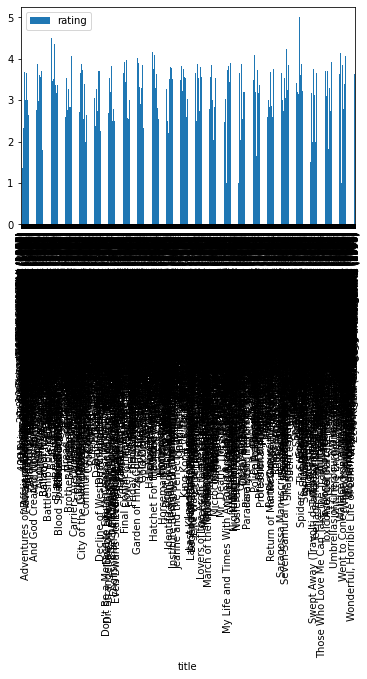

In [ ]:
table1.plot(kind='bar')

* พล็อตฮิสโตแกรมของ *จำนวน* ของการให้คะแนนภาพยนตร์แต่ละเรื่องที่ได้รับ


In [ ]:
data22 = data.groupby("title")[["rating"]].count()
data22

,rating
title,
"$1,000,000 Duck (1971)",37
'Night Mother (1986),70
'Til There Was You (1997),52
"'burbs, The (1989)",303
...And Justice for All (1979),199
...,...
"Zed & Two Noughts, A (1985)",29
Zero Effect (1998),301
Zero Kelvin (Kjærlighetens kjøtere) (1995),2


In [ ]:
df

In [ ]:
# 2 . Plot a histogram of the number of ratings each movie recieved. จำนวน ของการให้คะแนนภาพยนตร์แต่ละเรื่องที่ได้รับ
table2 = pd.pivot_table(data22,index=['title'],values=['rating'])
table2

,rating
title,
"$1,000,000 Duck (1971)",37
'Night Mother (1986),70
'Til There Was You (1997),52
"'burbs, The (1989)",303
...And Justice for All (1979),199
...,...
"Zed & Two Noughts, A (1985)",29
Zero Effect (1998),301
Zero Kelvin (Kjærlighetens kjøtere) (1995),2


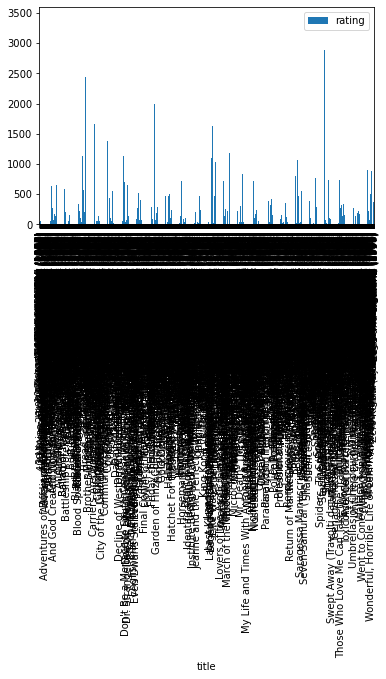

In [ ]:
table2.plot(kind='bar')

In [ ]:
# 3. Plot a histogram of the average rating for each movie.
table3= df.pivot_table('rating',index='title',aggfunc='mean')
table3

,rating
title,
"$1,000,000 Duck (1971)",3.027027
'Night Mother (1986),3.371429
'Til There Was You (1997),2.692308
"'burbs, The (1989)",2.910891
...And Justice for All (1979),3.713568
...,...
"Zed & Two Noughts, A (1985)",3.413793
Zero Effect (1998),3.750831
Zero Kelvin (Kjærlighetens kjøtere) (1995),3.500000


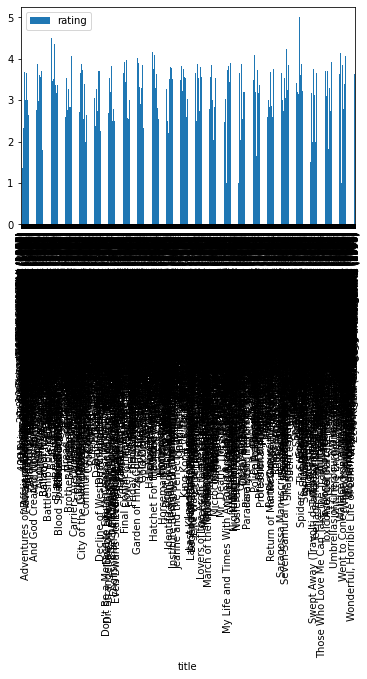

In [ ]:
table3.plot(kind='bar')

### 2.4 Plot a histogram of the *average rating* for movies which are rated more than 100 times.
* What do you observe about the tails of the histogram where you use all the movies versus the one where you only use movies rated more than 100 times?
* Which highly rated movies would you trust are actually good?  Those rated more than 100 times or those rated less than 100 times?

In [ ]:
data22 # data ที่มีการนับ rating

,rating
title,
"$1,000,000 Duck (1971)",37
'Night Mother (1986),70
'Til There Was You (1997),52
"'burbs, The (1989)",303
...And Justice for All (1979),199
...,...
"Zed & Two Noughts, A (1985)",29
Zero Effect (1998),301
Zero Kelvin (Kjærlighetens kjøtere) (1995),2


In [ ]:
data244 = data22.sort_values('rating',ascending=0).iloc[:2019,:]#หนังที่คะแนนโหวตมากกว่า 100 ขึ้นไป
data244

,rating
title,
American Beauty (1999),3428
Star Wars: Episode IV - A New Hope (1977),2991
Star Wars: Episode V - The Empire Strikes Back (1980),2990
Star Wars: Episode VI - Return of the Jedi (1983),2883
Jurassic Park (1993),2672
...,...
Othello (1995),100
Little Big League (1994),100
Dangerous Beauty (1998),100


In [ ]:
data2444 = data22.sort_values('rating',ascending=0).iloc[2019:,:] #หนังที่คะแนนโหวตน้อยกว่า 100
data2444

,rating
title,
Brief Encounter (1946),99
Home for the Holidays (1995),99
"NeverEnding Story III, The (1994)",99
Problem Child 2 (1991),99
Friday the 13th Part VIII: Jason Takes Manhattan (1989),99
...,...
Target (1995),1
I Don't Want to Talk About It (De eso no se habla) (1993),1
An Unforgettable Summer (1994),1


In [ ]:
table4= pd.pivot_table(data244,index=['title'],values=['rating']) #เตรียม plot เรตติ้งมากกว่า 100
table4

,rating
title,
"'burbs, The (1989)",303
...And Justice for All (1979),199
10 Things I Hate About You (1999),700
101 Dalmatians (1961),565
101 Dalmatians (1996),364
...,...
Young Guns II (1990),369
Young Sherlock Holmes (1985),379
Your Friends and Neighbors (1998),109


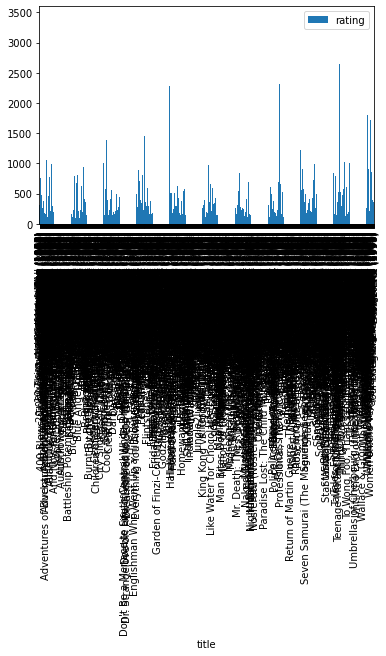

In [ ]:
table4.plot(kind='bar')

In [ ]:
table44= pd.pivot_table(data2444,index=['title'],values=['rating']) #เตรียม plot เรตติ้งน้อยกว่า 100
table44

,rating
title,
"$1,000,000 Duck (1971)",37
'Night Mother (1986),70
'Til There Was You (1997),52
1-900 (1994),2
187 (1997),55
...,...
Young and Innocent (1937),10
Zachariah (1971),2
"Zed & Two Noughts, A (1985)",29


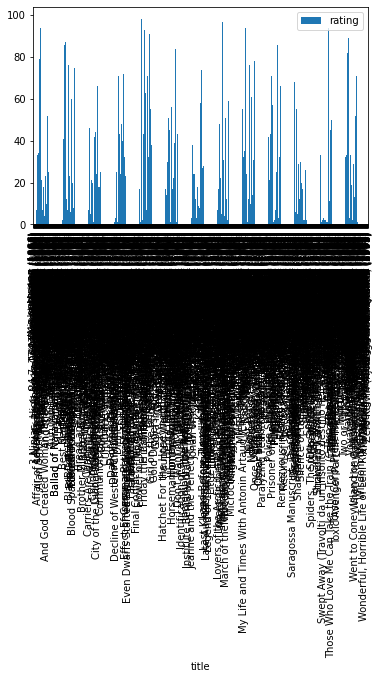

In [ ]:
table44.plot(kind='bar')

### 2.5 คาดเดาเกี่ยวกับการกระจายการให้คะแนน? สนับสนุนคำตอบของคุณด้วยข้อมูล!
    * ในช่วงอายุ18-24 (18) จะให้คะเเนนเรตติ้งเฉลี่ยในหนังประเภท สารคดี ไม่เกิน 4
    (ดูข้อมูล ช่วงอายุ18-24 ว่าให้คะเเนนหนังประเภท สารคดี(documentary) เท่าไหร่ ?)
    ถ้ากราฟให้คะเเนนอยู่ใน่ชวง <4 สมมติฐานถูก ถ้ามากกว่า>4 เเสดงว่าสมมติฐานเราผิด    

In [ ]:
data25 = data16m[(data16m['genres']=='Documentary')].sort_values('rating',ascending=0) #846 คน
data25

,rating,age,genres
851116,5,18,Documentary
751268,5,18,Documentary
848981,5,18,Documentary
848959,5,18,Documentary
848929,5,18,Documentary
...,...,...,...
945557,1,18,Documentary
560869,1,18,Documentary
945553,1,18,Documentary
491867,1,18,Documentary


In [ ]:
table5 = pd.pivot_table(data25,index=['genres'],values=['rating'])
table5

,rating
genres,
Documentary,3.835697


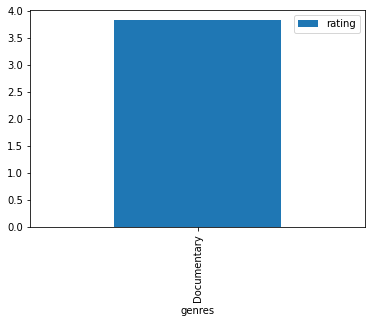

In [ ]:
table5.plot(kind='bar')

*  ในช่วงอายุ18-24 (18) ได้คะเเนนเรตติ้งเฉลี่ยในหนังประเภท"สารคดี" อยู่ที่ 3.83


# Problem 3: (20 points total)
## 3. Correlation:  Men versus women

Let look more closely at the relationship between the pieces of data we have.

* Make a scatter plot of men versus women and their mean rating for every movie.
* Make a scatter plot of men versus women and their mean rating for movies rated more than 200 times.
* 3.1 Compute the *correlation coefficent* between the ratings of men and women.
    * What do you observe?
    * Are the ratings similiar or not? Support your answer with data!
* 3.2 Conjecture under what circumstances the rating given by one gender can be used to predict the rating given by the other gender.
    * For example, are men and women more similar when they are younger or older?
    * Be sure to come up with your own conjectures and support them with data!

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
import matplotlib

In [ ]:
data31 = data[['gender','rating','title']]
data311 = data31.drop_duplicates('title', keep='last')

In [ ]:
data311f=data311.replace({'F':'b','M':'r'})
#แทนค่าสีแล้ว

In [ ]:
data311f

,gender,rating,title
1724,r,4,One Flew Over the Cuckoo's Nest (1975)
2249,b,3,James and the Giant Peach (1996)
2885,b,4,My Fair Lady (1964)
4200,b,4,Erin Brockovich (2000)
5903,b,4,"Bug's Life, A (1998)"
...,...,...,...
1000204,r,5,Modulations (1998)
1000205,r,3,Broken Vessels (1998)
1000206,r,1,White Boys (1999)
1000207,b,5,One Little Indian (1973)


In [ ]:
data311m = data311[

In [ ]:
plt.scatter(data311)

* สร้างพล็อตเรื่องผู้ชายกับผู้หญิงและให้คะแนนเฉลี่ยสำหรับภาพยนตร์ทุกเรื่อง

### A scatter plot of men versus women and their mean rating for every movie

##3.1 A scatter plot of men versus women and their mean rating for movies rated more than 200 times 

In [ ]:
#-------------------------------
# Your code goes here.
# Add as many cells as you need
#-------------------------------




### The correlation coefficent between the ratings of men and women

In [ ]:
#-------------------------------
# Your code goes here.
# Add as many cells as you need
#-------------------------------




##3.2 Conjecture under what circumstances the rating given by one gender can be used to predict the rating given by the other gender

Example<br>
Conjecture 1: Men and women are more similar when they are older, consider their rating over the same genres.

Conjecture 2: Men and women more similar when they are academic/educator, artist, college/grad student, and programmer.

Conjecture 3: Men and women more similar when they watch Action, Drama, War, and Triller. 

### 3.2 ผู้ชายและผู้หญิงที่ทำอาชีพนักวิทยาศาสตร์ มีความคล้ายคลึงกันในการให้คะแนนหนังประเภท Sci-fi

In [114]:
data.head()

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama


In [115]:
data32 = data[['title','rating','gender','occupation','genres']].sort_values('occupation',ascending=0)#ได้ตารางข้อมูลที่เรียงอาชีพแล้ว
data32

,title,rating,gender,occupation,genres
894018,"Replacement Killers, The (1998)",4,M,20,Action|Thriller
950861,Tex (1982),4,M,20,Drama
678120,Freaky Friday (1977),4,M,20,Children's|Comedy
891140,"Thin Man, The (1934)",3,M,20,Mystery
678136,Freaky Friday (1977),4,M,20,Children's|Comedy
...,...,...,...,...,...
669710,On Her Majesty's Secret Service (1969),3,M,0,Action
386743,American History X (1998),5,F,0,Drama
386761,American History X (1998),3,M,0,Drama
386767,American History X (1998),4,M,0,Drama


In [116]:
data322 = data32[data32['occupation']==15]
data322 #ได้ตารางที่มีข้อมูลเฉพาะอาชีพนักวิทยาศาสตร์

,title,rating,gender,occupation,genres
234818,"Bridge on the River Kwai, The (1957)",3,M,15,Drama|War
282439,Election (1999),4,F,15,Comedy
389517,"Joy Luck Club, The (1993)",4,M,15,Drama
297514,Reservoir Dogs (1992),4,M,15,Crime|Thriller
248958,"Insider, The (1999)",5,F,15,Drama
...,...,...,...,...,...
968502,"Mirror, The (Zerkalo) (1975)",5,M,15,Drama
827995,"Kentucky Fried Movie, The (1977)",4,M,15,Comedy
970485,"Last Temptation of Christ, The (1988)",5,F,15,Drama
892331,"House of Yes, The (1997)",3,M,15,Comedy|Drama|Thriller


In [117]:
data322m = data322[data322['gender']=='M']
data322m #ตารางนักวิทยาศาสตร์ ช

,title,rating,gender,occupation,genres
234818,"Bridge on the River Kwai, The (1957)",3,M,15,Drama|War
389517,"Joy Luck Club, The (1993)",4,M,15,Drama
297514,Reservoir Dogs (1992),4,M,15,Crime|Thriller
21682,Pleasantville (1998),3,M,15,Comedy
793393,Soul Man (1986),3,M,15,Comedy
...,...,...,...,...,...
863256,Agnes of God (1985),4,M,15,Drama|Mystery
968502,"Mirror, The (Zerkalo) (1975)",5,M,15,Drama
827995,"Kentucky Fried Movie, The (1977)",4,M,15,Comedy
892331,"House of Yes, The (1997)",3,M,15,Comedy|Drama|Thriller


In [120]:
data322Sm = data322m[data322m['genres']=='Sci-Fi']

In [121]:
data322Sm[['rating']].mean()

rating    3.710744
dtype: float64

In [123]:
data322f = data322[data322['gender']=='F']
data322f #ตารางนักวิทยาศาสตร์ ญ

,title,rating,gender,occupation,genres
282439,Election (1999),4,F,15,Comedy
248958,"Insider, The (1999)",5,F,15,Drama
737902,Midnight Run (1988),4,F,15,Action|Adventure|Comedy|Crime
281296,"Hard 8 (a.k.a. Sydney, a.k.a. Hard Eight) (1996)",4,F,15,Crime|Thriller
389671,"Joy Luck Club, The (1993)",4,F,15,Drama
...,...,...,...,...,...
204413,Butch Cassidy and the Sundance Kid (1969),5,F,15,Action|Comedy|Western
417985,When Harry Met Sally... (1989),4,F,15,Comedy|Romance
127242,Dances with Wolves (1990),5,F,15,Adventure|Drama|Western
66663,Star Wars: Episode I - The Phantom Menace (1999),5,F,15,Action|Adventure|Fantasy|Sci-Fi


In [124]:
data322Sf = data322f[data322f['genres']=='Sci-Fi']

In [126]:
data322Sf[['rating']].mean()

rating    3.92
dtype: float64

* ผู้ชายและผู้หญิงที่ทำอาชีพนักวิทยาศาสตร์มีความคล้ายคลึงกันในการให้คะแนนหนังประเภท Sci-fi 
  * โดยที่นักวิทยาศาสตร์เพศชายให้คะแนนหนังประเภท Sci-fi  อยู่ที่ 3.710744
  * โดยที่นักวิทยาศาสตร์เพศหญิงให้คะแนนหนังประเภท Sci-fi อยู่ที่ 3.92


# Problem 4: 
# Open Ended Question:  Business Intelligence
1. จากเรตติ้งของคะเเนนหนังเเนวใดมากที่สุด ควรผลิตหนังเเนวนั้นออกมา(เรียกดูเเนวหนังที่จำนวนคนให้คะเเนนเยอะสุด(ไม่จำเป็นต้องให้คะเเนนเยอะก็ได้ สนใจแค่เเนวไหนคนเข้าดูเเล้วมาให้คะเเนนเยอะสุด ประมาณนี้)
2. 
3. ช่วงวัยรุ่นมีความถี่ในหารให้คะเเนนหนังเเนว… มากที่สุด ควรทำเเนว… ออกมาเพื่อเพิ่มยอดขาย (เรียกดูช่วงอายุ18-24ว่าให้คะเเนนหนังแนวไหนมากสุด)

### 1. จากเรตติ้งของคะเเนนหนังเเนวใดมากที่สุด ควรผลิตหนังเเนวนั้นออกมา(เรียกดูเเนวหนังที่จำนวนคนให้คะเเนนเยอะสุด(ไม่จำเป็นต้องให้คะเเนนเยอะก็ได้ สนใจแค่เเนวไหนคนเข้าดูเเล้วมาให้คะเเนนเยอะสุด ประมาณนี้)

In [173]:
data41 = data[(data['rating']==5)][['title','rating','genres']]
data41

,title,rating,genres
0,One Flew Over the Cuckoo's Nest (1975),5,Drama
1,One Flew Over the Cuckoo's Nest (1975),5,Drama
4,One Flew Over the Cuckoo's Nest (1975),5,Drama
6,One Flew Over the Cuckoo's Nest (1975),5,Drama
7,One Flew Over the Cuckoo's Nest (1975),5,Drama
...,...,...,...
1000189,Brother Minister: The Assassination of Malcolm...,5,Documentary
1000195,Lured (1947),5,Crime
1000199,Song of Freedom (1936),5,Drama
1000204,Modulations (1998),5,Documentary


In [184]:
data411 = data41.drop_duplicates('title', keep='last')
data411

,title,rating,genres
1722,One Flew Over the Cuckoo's Nest (1975),5,Drama
2247,James and the Giant Peach (1996),5,Animation|Children's|Musical
2882,My Fair Lady (1964),5,Musical|Romance
4198,Erin Brockovich (2000),5,Drama
5902,"Bug's Life, A (1998)",5,Animation|Children's|Comedy
...,...,...,...
1000189,Brother Minister: The Assassination of Malcolm...,5,Documentary
1000195,Lured (1947),5,Crime
1000199,Song of Freedom (1936),5,Drama
1000204,Modulations (1998),5,Documentary


In [176]:
data411[['genres']].describe() # Drama เยอะสุด = 633 เรื่อง

,genres
count,3232
unique,296
top,Drama
freq,633


###2.Jumanji มีความถี่ของการให้คะแนนมากน้อยเพียงและควรทำภาคต่อหรือไม่

In [178]:
data42 = data[['title','rating','age','genres']]

In [ ]:
data42[data42['genres']=="Adventure|Children's|Fantasy"].sort_values('title',ascending=0)

In [207]:
data421a = data42[data42['title']=='Santa Claus: The Movie (1985)'] # 223 ครั้งในการให้คะแนน
data421a

,title,rating,age,genres
544392,Santa Claus: The Movie (1985),4,35,Adventure|Children's|Fantasy
544393,Santa Claus: The Movie (1985),4,45,Adventure|Children's|Fantasy
544394,Santa Claus: The Movie (1985),2,25,Adventure|Children's|Fantasy
544395,Santa Claus: The Movie (1985),2,25,Adventure|Children's|Fantasy
544396,Santa Claus: The Movie (1985),3,18,Adventure|Children's|Fantasy
...,...,...,...,...
544610,Santa Claus: The Movie (1985),1,18,Adventure|Children's|Fantasy
544611,Santa Claus: The Movie (1985),2,18,Adventure|Children's|Fantasy
544612,Santa Claus: The Movie (1985),3,25,Adventure|Children's|Fantasy
544613,Santa Claus: The Movie (1985),2,25,Adventure|Children's|Fantasy


In [208]:
data421a[['rating']].mean()

rating    2.668161
dtype: float64

In [200]:
data421 = data42[data42['title']=='Jumanji (1995)'] # 701 ครั้ง
data421

,title,rating,age,genres
432302,Jumanji (1995),5,35,Adventure|Children's|Fantasy
432303,Jumanji (1995),3,45,Adventure|Children's|Fantasy
432304,Jumanji (1995),2,18,Adventure|Children's|Fantasy
432305,Jumanji (1995),2,35,Adventure|Children's|Fantasy
432306,Jumanji (1995),1,25,Adventure|Children's|Fantasy
...,...,...,...,...
432998,Jumanji (1995),3,45,Adventure|Children's|Fantasy
432999,Jumanji (1995),3,25,Adventure|Children's|Fantasy
433000,Jumanji (1995),2,1,Adventure|Children's|Fantasy
433001,Jumanji (1995),4,25,Adventure|Children's|Fantasy


In [201]:
data421[['rating']].mean()

rating    3.201141
dtype: float64

* "Jumanji (1995)" มีความถี่ของการให้คะแนนอยู่ที่ 701 ครั้งและเรตติ้งเฉลี่ยอยู่ที่ 3.20 มากกว่าเรื่อง
"Santa Claus: The Movie (1985)" ที่เป็นหนังแนวเดียวกันและที่มีความถี่ในการให้เรตติ้งที่ 223 ครั้งและเรตติ้งเฉลี่ยอยู่ที่ 2.66 
* สรุปได้ว่า Jumanji (1955) ควรเสนอแก่บริษัททำหนังเพื่อทำภาคต่อ

###3. ช่วงวัยรุ่นมีการให้คะเเนนหนังเเนว… มากที่สุด ควรทำเเนว… ออกมาเพื่อเพิ่มยอดขาย (เรียกดูช่วงอายุ18-24ว่าให้คะเเนนหนังแนวไหนมากสุด)

In [148]:
data43 = data[['title','rating','age','gender','genres']]

In [150]:
data431 = data43.drop_duplicates('title', keep='last')
data431

,title,rating,age,gender,genres
1724,One Flew Over the Cuckoo's Nest (1975),4,25,M,Drama
2249,James and the Giant Peach (1996),3,45,F,Animation|Children's|Musical
2885,My Fair Lady (1964),4,45,F,Musical|Romance
4200,Erin Brockovich (2000),4,25,F,Drama
5903,"Bug's Life, A (1998)",4,25,F,Animation|Children's|Comedy
...,...,...,...,...,...
1000204,Modulations (1998),5,18,M,Documentary
1000205,Broken Vessels (1998),3,35,M,Drama
1000206,White Boys (1999),1,18,M,Drama
1000207,One Little Indian (1973),5,18,F,Comedy|Drama|Western


In [156]:
data431a = data431[data431['age']==18]
data431a

,title,rating,age,gender,genres
8925,Ben-Hur (1959),2,18,M,Action|Adventure|Drama
74060,U.S. Marshalls (1998),4,18,M,Action|Thriller
85898,Simon Birch (1998),4,18,M,Drama
148640,Conspiracy Theory (1997),5,18,F,Action|Mystery|Romance|Thriller
155725,Die Hard: With a Vengeance (1995),4,18,M,Action|Thriller
...,...,...,...,...,...
1000186,"Truce, The (1996)",1,18,F,Drama|War
1000192,Six Ways to Sunday (1997),4,18,F,Comedy
1000204,Modulations (1998),5,18,M,Documentary
1000206,White Boys (1999),1,18,M,Drama


In [157]:
data431[['genres']].describe() #ในช่วงวัยรุ่นชอบแนวดราม่าเยอะสุด = 759

,genres
count,3706
unique,301
top,Drama
freq,759


# Done!

** What do you need to submit?**

* **Notebook File**: This is the file you need to submit. Please make sure all the plotted tables and figures are in the notebook. 


* **PPT Slides**: please prepare PPT slides (10 minutes)
    * Motivation about the data collection, why the topic is interesting to you. อธิบายเกี่ยวกับข้อมูล สร้างแรงบันดาลใจเดี่ยวกับข้อมูลให้ผู้รับฟัง ให้ผู้ฟังเข้าใจความเป็นมาและความสำคัญของข้อมูล
    * What is the relationship between this topic and Business Intelligence?
    * How did you analyse the data?
    * What conjectures did you make and how did you support or disprove them using data?
    * Communicating Results with figures or tables 
    * Did you find anything suprising in the data?
    * What business decision do you think this data could help answer?  Why?

     (please include figures or tables in the report)
     

# ** How to submit: **

        ส่ง link ของ ipynb และ slides ใน Google Classroom
        
** Note: Each team just needs to submits one submission **